# K Means 

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Create and load dataset

In [43]:
df = pd.read_csv('D:/UC DAVIS/ECI 273/project/data/clean_data.csv', delimiter=',')


In [44]:
df

,evap_cfs,inflow_cfs,elevation_feet,ppt_feet,storage_ft,outflow_cfs
0,1.230449,3.382737,2.866925,0.000000,13.829758,3.550840
1,1.113943,3.318481,2.866701,0.000000,13.828818,3.585122
2,1.591065,3.204663,2.866465,0.000000,13.827829,3.523616
3,1.361728,3.304706,2.866234,0.000000,13.826863,3.570776
4,1.361728,3.281488,2.865986,0.000000,13.825822,3.568554
...,...,...,...,...,...,...
1798,1.176091,3.480438,2.820851,-2.380211,13.633561,3.301030
1799,1.278754,3.546296,2.821160,-1.026103,13.634895,3.301030
1800,1.342423,3.566437,2.821507,0.000000,13.636399,3.278754
1801,1.000000,3.413970,2.821664,-2.234083,13.637079,3.255273


<ipython-input-93-2ae93cd96fe0>:7: RuntimeWarning: invalid value encountered in log10
  df[c][i] = np.log10(df[c][i])


### Check if log values are normally dist

In [13]:
def norm_checker(annQ):
    m = np.mean(annQ)
    s = np.std(annQ)
    g = stats.skew(annQ)
    N = len(annQ)

    print('Mean = %f' % m)
    print('Std. Dev. = %f' % s)
    print('Skew Coef. = %f' % g) # no skew function in numpy

    # other keyword arguments: bins, normed (for PDF instead of count)
    plt.hist(annQ, bins = 50, density=True, color='gray', edgecolor='none')

    # plot the fitted pdf on top of the histogram
    x = np.arange(min(annQ),max(annQ), 10) # points to plot at
    pdf = stats.norm.pdf(x, loc=m, scale=s)
    plt.plot(x, pdf, color='k', linewidth=2)
    plt.xlabel('inflow (taf/yr)')
    plt.ylabel('pdf')
    plt.show()

Mean = 3.512430
Std. Dev. = 0.431901
Skew Coef. = nan


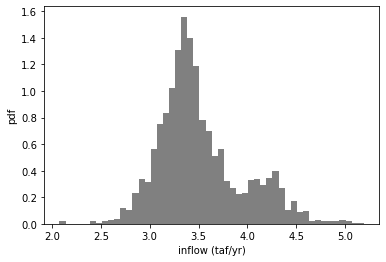

In [20]:
norm_checker(df['inflow_cfs'])


### Function that makes scatter plots, all with respect to outflow

In [21]:
def scatter(col,data):
    col = str(col) #convert to string just in case
    X =  df[[col,'outflow_cfs']]
    X = X.to_numpy()
    
    # Plot scatter
    plt.scatter(
       X[:, 0], X[:, 1],
       c='white',
       edgecolor='black'
    )
    plt.title("Plot of %s against outflow" % col)
    plt.xlabel(col)
    plt.ylabel("outflow_cfs")
    plt.show()


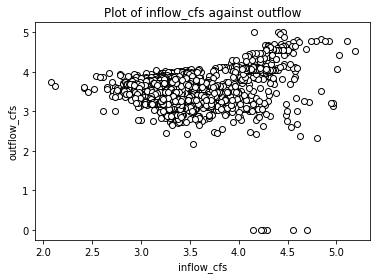

In [35]:
scatter('inflow_cfs',df)

### Kmeans model initialization

In [45]:
def cluster(col,data):
    # fixed the kmeans method, but this can be changed
    
    ## NOTE IF YOU CHANGE THE CLUSTERS U MUST CHANGE THE SCATTER PLOTS TOO
    
    kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=4, 
    tol=1e-04, random_state=2)
    
    col = str(col) #convert to string just in case
    X =  df[[col,'outflow_cfs']]
    X = X.to_numpy()
    
    # fit model
    y_km = kmeans.fit_predict(X)
    
    # plot model
    # plot the 3 clusters
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='lightgreen',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='orange',
        label='cluster 2'
    )

    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='lightblue',
        label='cluster 3'
    )

    # plot the centroids
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.title("Plot of %s against outflow" % col)
    plt.xlabel(col)
    plt.ylabel("outflow_cfs")
    plt.legend(scatterpoints=1)

In [46]:
cluster('inflow_cfs',df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').